In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

dataset=pd.read_csv('RTA Dataset.csv')
df=pd.read_csv('RTA Dataset.csv')

dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [57]:
dataset.shape

(12316, 32)

In [58]:
dataset.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [59]:
dataset.describe(include='all')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
dataset.duplicated().sum()

0

In [61]:
dataset.groupby('Accident_severity').size()

Accident_severity
Fatal injury        158
Serious Injury     1743
Slight Injury     10415
dtype: int64

In [62]:
#data preprocessing
dataset.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [64]:
dataset['Time']=pd.to_datetime(dataset['Time'])

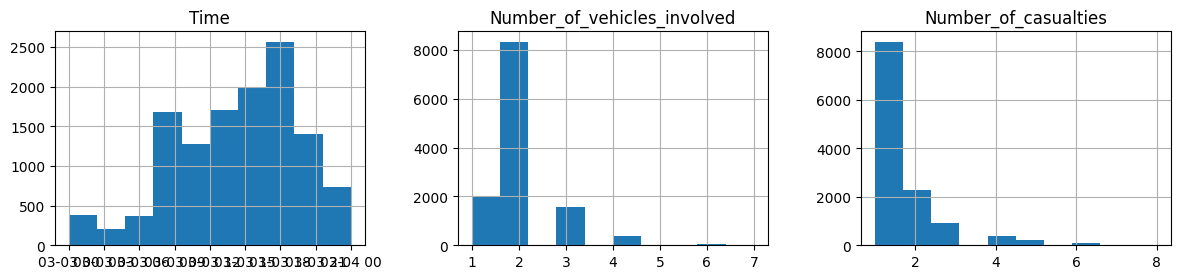

In [65]:
#numerical data analysis
dataset.hist(layout=(3,6),figsize=(30,10))
plt.show()

In [66]:
dataset['Number_of_casualties'].value_counts()

1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: Number_of_casualties, dtype: int64

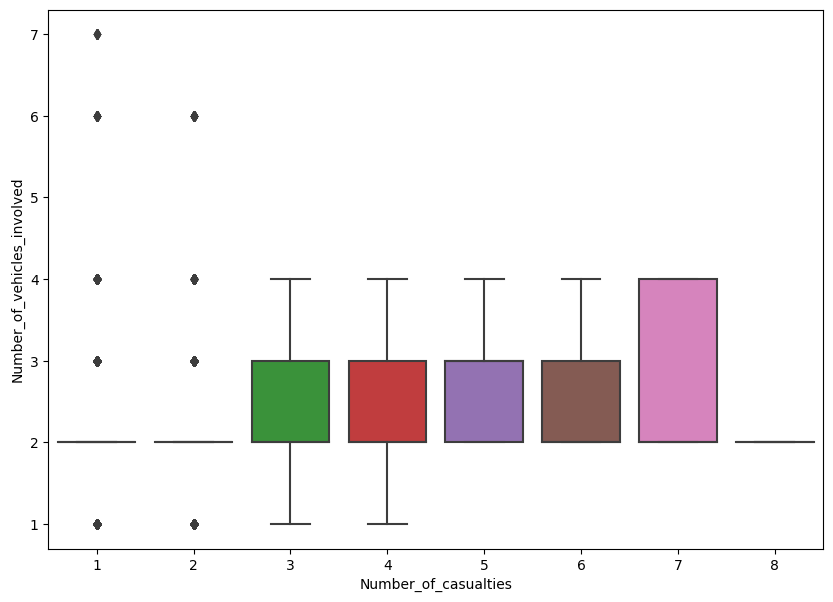

In [67]:
plt.figure(figsize=(10,7))
sns.boxplot(data=dataset, y='Number_of_vehicles_involved', x='Number_of_casualties')
plt.show()

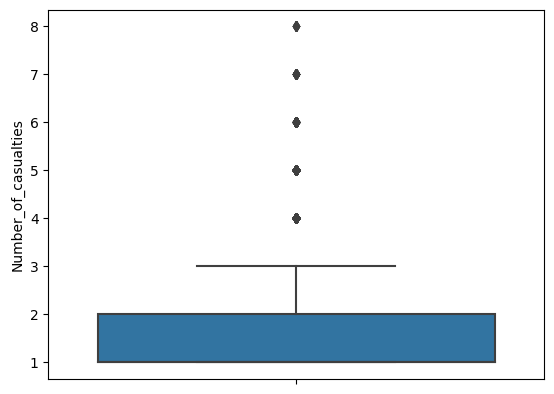

In [68]:
sns.boxplot(data=dataset, y='Number_of_casualties')
plt.show()

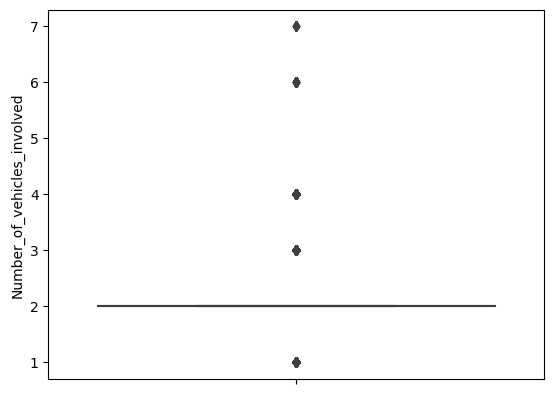

In [69]:
sns.boxplot(data=dataset, y='Number_of_vehicles_involved')
plt.show()

In [70]:
dataset['Number_of_vehicles_involved']

0        2
1        2
2        2
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Number_of_vehicles_involved, Length: 12316, dtype: int64

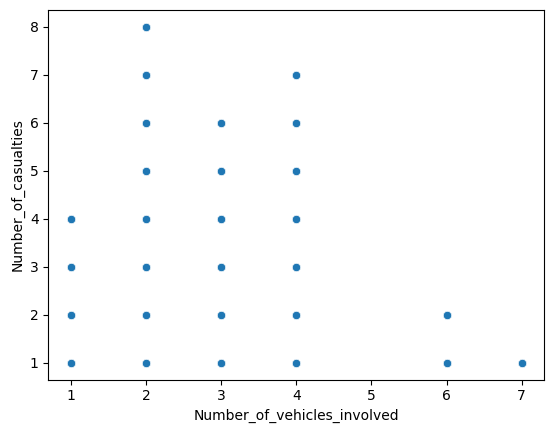

In [71]:
sns.scatterplot(x=dataset['Number_of_vehicles_involved'], y=dataset['Number_of_casualties'])
plt.show()


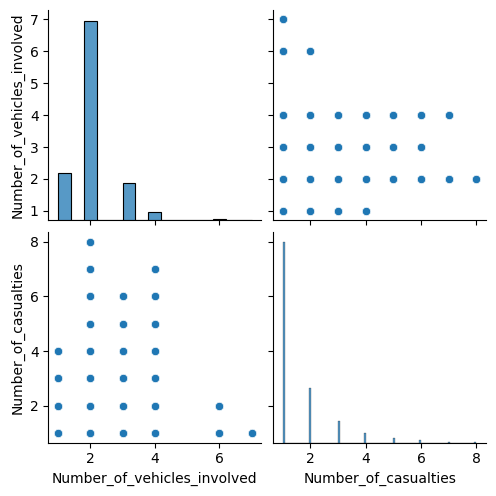

In [72]:
sns.pairplot(dataset[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

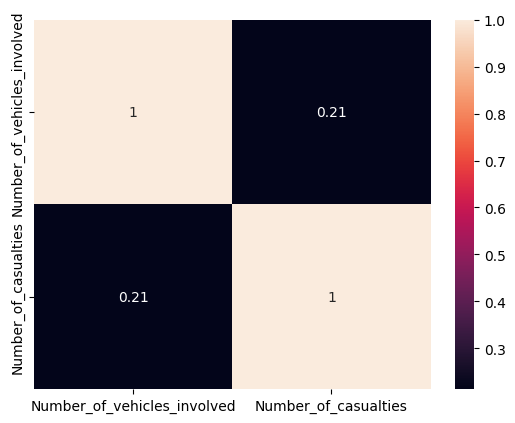

In [73]:
correlation_matrix = dataset[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

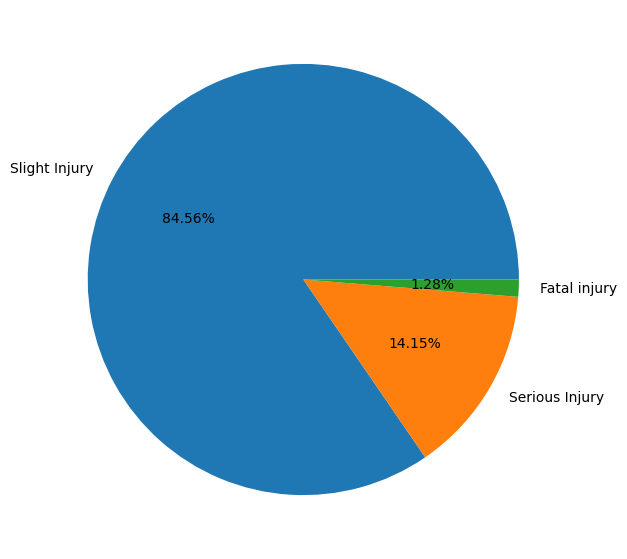

In [74]:
#categorical data analysis
plt.figure(figsize=(10,7))
plt.pie(x=dataset['Accident_severity'].value_counts().values,
        labels=dataset['Accident_severity'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


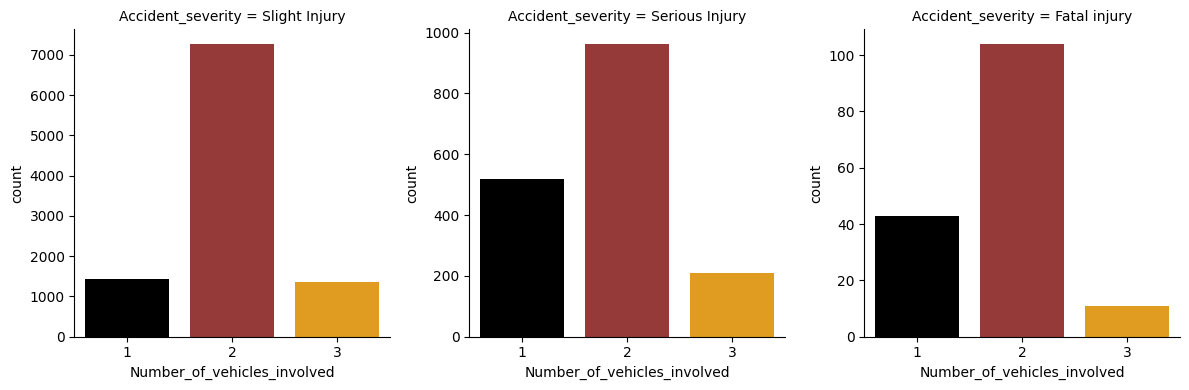

In [75]:
 #creating a facet grid with columns as survived=0 and survived=1
grid = sns.FacetGrid(data=dataset, col='Accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

In [76]:
#Droping columns which create imbalan
lists=['Time','Driving_experience','Age_band_of_driver','Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality','Casualty_severity','Educational_level','Defect_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle', 'Road_surface_type','Sex_of_casualty']
dataset.drop(columns = lists, axis=1 ,inplace=True)

In [77]:
dataset.shape

(12316, 19)

In [78]:
dataset['Type_of_vehicle'].fillna(dataset['Type_of_vehicle'].mode()[0], inplace=True)
dataset['Area_accident_occured'].fillna(dataset['Area_accident_occured'].mode()[0], inplace=True)
dataset['Road_allignment'].fillna(dataset['Road_allignment'].mode()[0], inplace=True)
dataset['Type_of_collision'].fillna(dataset['Type_of_collision'].mode()[0], inplace=True)
dataset['Vehicle_movement'].fillna(dataset['Vehicle_movement'].mode()[0], inplace=True)
dataset['Lanes_or_Medians'].fillna(dataset['Lanes_or_Medians'].mode()[0], inplace=True)
dataset['Types_of_Junction'].fillna(dataset['Types_of_Junction'].mode()[0], inplace=True)

In [79]:
dataset.nunique()

Day_of_week                     7
Sex_of_driver                   3
Type_of_vehicle                17
Area_accident_occured          14
Lanes_or_Medians                7
Road_allignment                 9
Types_of_Junction               8
Road_surface_conditions         4
Light_conditions                4
Weather_conditions              9
Type_of_collision              10
Number_of_vehicles_involved     6
Number_of_casualties            8
Vehicle_movement               13
Casualty_class                  4
Age_band_of_casualty            6
Pedestrian_movement             9
Cause_of_accident              20
Accident_severity               3
dtype: int64

In [80]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [81]:
#label encoding
le=LabelEncoder()
dataset['Light_conditions']= le.fit_transform(dataset['Light_conditions'])
dataset['Weather_conditions']= le.fit_transform(dataset['Weather_conditions'])
dataset['Type_of_collision']= le.fit_transform(dataset['Type_of_collision'])
dataset['Vehicle_movement']= le.fit_transform(dataset['Vehicle_movement'])
dataset['Accident_severity']= le.fit_transform(dataset['Accident_severity'])
dataset['Day_of_week']= le.fit_transform(dataset['Day_of_week'])

In [82]:
#feature selection
x=dataset.drop(columns=['Accident_severity'])
y=dataset['Accident_severity']

In [83]:
fit_features=SelectKBest(score_func=f_classif)
fit_features.fit(x,y)


ValueError: could not convert string to float: 'Male'

In [84]:
pd.DataFrame(fit_features.scores_)
SCORE_COL=pd.DataFrame(fit_features.scores_,columns=['score value'])

AttributeError: 'SelectKBest' object has no attribute 'scores_'

In [85]:
topr_features=pd.concat([pd.DataFrame(x.columns),SCORE_COL],axis=1)
topr_features
#topr_features.nlargest(8,'score value')


NameError: name 'SCORE_COL' is not defined

In [86]:
listss=['Sex_of_driver','Types_of_Junction','Type_of_vehicle','Area_accident_occured','Lanes_or_Medians','Road_allignment','Road_surface_conditions','Casualty_class','Age_band_of_casualty','Cause_of_accident']
dataset.drop(columns = listss, axis=1,inplace=True)

In [87]:
dataset.shape

(12316, 9)

In [88]:
dataset.columns

Index(['Day_of_week', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Pedestrian_movement',
       'Accident_severity'],
      dtype='object')

In [89]:
dataset.head()

,Day_of_week,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Accident_severity
0,1,3,2,3,2,2,2,Not a Pedestrian,2
1,1,3,2,8,2,2,2,Not a Pedestrian,2
2,1,3,2,2,2,2,2,Not a Pedestrian,1
3,3,0,2,8,2,2,2,Not a Pedestrian,2
4,3,0,2,8,2,2,2,Not a Pedestrian,2


In [90]:

dataset.drop(['Pedestrian_movement'],axis=1,inplace=True)

In [91]:
dataset.shape

(12316, 8)

In [92]:
dataset.columns

Index(['Day_of_week', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Accident_severity'],
      dtype='object')

In [93]:
dictlight=dict(zip(df.Light_conditions,dataset.Light_conditions))
dictweek=dict(zip(df.Day_of_week,dataset.Day_of_week))

dictcollision=dict(zip(df.Type_of_collision,dataset.Type_of_collision))
dictweather=dict(zip(df.Weather_conditions,dataset.Weather_conditions))
dictvehiclemovement=dict(zip(df.Vehicle_movement,dataset.Vehicle_movement))


In [94]:
#sampling using smote
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
x = dataset.drop('Accident_severity', axis=1)
y = dataset['Accident_severity']

In [95]:
os=SMOTE()
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)
#xtrain,ytrain=os.fit_resample(xtrain,ytrain)

In [96]:
xtrain.shape

(9852, 7)

In [97]:
ytrain.shape

(9852,)

In [98]:
from collections import Counter
counter = Counter(ytrain)

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

Class= 1, n=1396 (14.17%)
Class= 2, n=8326 (84.51%)
Class= 0, n=130 (1.32%)


In [99]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rclf=RandomForestClassifier()


In [100]:
rclf.fit(xtrain,ytrain)

RandomForestClassifier()

In [101]:
rclf.score(xtest,ytest)

0.84375

In [102]:
from sklearn.tree import DecisionTreeClassifier
dctf=DecisionTreeClassifier()

In [103]:
dctf.fit(xtrain,ytrain)
dctf.score(xtest,ytest)



0.8246753246753247

In [105]:
inputa=np.array([dictweek['Sunday'],dictlight['Daylight'],dictweather['Normal'],dictcollision['Vehicle with vehicle collision'],3,5,dictvehiclemovement['Overtaking']])
inputa=inputa.reshape(1,-1)
a=np.array([1,0,4,1,1,5,3,0]).reshape(1,-1)
predicted=rclf.predict(inputa)
predicted[0]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


2

In [106]:
import pickle

In [108]:
pickle.dump(rclf,open("model.pkl","wb"))

In [109]:
dataset.Accident_severity.value_counts()


2    10415
1     1743
0      158
Name: Accident_severity, dtype: int64

In [110]:
df.Accident_severity.value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [111]:
dataset.Day_of_week.value_counts()

0    2041
4    1851
6    1840
5    1770
1    1681
2    1666
3    1467
Name: Day_of_week, dtype: int64

In [ ]:
df.Day_of_week.value_counts()

Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: Day_of_week, dtype: int64

In [ ]:
dataset.Type_of_collision.value_counts()

8    8929
2    1786
1     896
6     397
0     171
3      54
4      34
5      26
7      14
9       9
Name: Type_of_collision, dtype: int64

In [ ]:
df.Type_of_collision.value_counts()

Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: Type_of_collision, dtype: int64

In [ ]:
dataset.Weather_conditions.value_counts()

2    10063
4     1331
3      296
7      292
0      125
8       98
6       61
5       40
1       10
Name: Weather_conditions, dtype: int64

In [ ]:
df.Weather_conditions.value_counts()

Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: Weather_conditions, dtype: int64

In [ ]:
dataset.Light_conditions.value_counts()

3    8798
0    3286
2     192
1      40
Name: Light_conditions, dtype: int64

In [ ]:
df.Light_conditions.value_counts()

Daylight                   8798
Darkness - lights lit      3286
Darkness - no lighting      192
Darkness - lights unlit      40
Name: Light_conditions, dtype: int64

In [ ]:
dataset.Vehicle_movement.value_counts()

2     8466
3      985
4      937
7      563
9      489
1      339
0      193
5       96
11      88
8       61
10      50
12      39
6       10
Name: Vehicle_movement, dtype: int64

In [ ]:
df.Vehicle_movement.value_counts()

Going straight         8158
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: Vehicle_movement, dtype: int64